In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset = pd.read_csv('/home/leo0419/Desktop/Complete-Deep-Learning-master/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [20]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [21]:
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [25]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [26]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


/home/leo0419/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 4s 782us/step - loss: 0.7766 - accuracy: 0.5848 - val_loss: 0.5156 - val_accuracy: 0.7910
Epoch 2/100
5359/5359 [==============================] - 3s 549us/step - loss: 0.4982 - accuracy: 0.7960 - val_loss: 0.4870 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 3s 505us/step - loss: 0.4771 - accuracy: 0.7960 - val_loss: 0.4707 - val_accuracy: 0.7989
Epoch 4/100
5359/5359 [==============================] - 3s 612us/step - loss: 0.4586 - accuracy: 0.8018 - val_loss: 0.4577 - val_accuracy: 0.8016
Epoch 5/100
5359/5359 [==============================] - 4s 724us/step - loss: 0.4438 - accuracy: 0.8022 - val_loss: 0.4472 - val_accuracy: 0.8061
Epoch 6/100
5359/5359 [==============================] - 4s 748us/step - loss: 0.4317 - accuracy: 0.8069 - val_loss: 0.4376 - val_accuracy: 0.8008
Epoch 7/100
5359/5359 [==============================] - 4s 733us/step

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


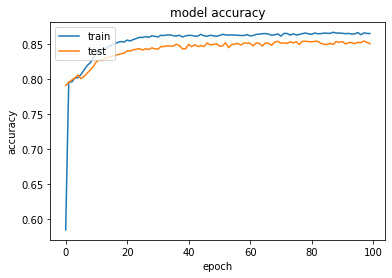

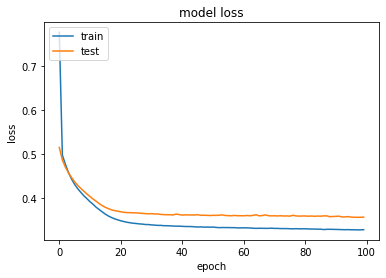

In [27]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)




In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

/home/leo0419/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
/home/leo0419/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
/home/leo0419/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
/home/leo0419/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 4s 777us/step - loss: 0.6347 - accuracy: 0.6802 - val_loss: 0.5464 - val_accuracy: 0.7887
Epoch 2/100
5359/5359 [==============================] - 3s 506us/step - loss: 0.5158 - accuracy: 0.7938 - val_loss: 0.4979 - val_accuracy: 0.7952
Epoch 3/100
5359/5359 [==============================] - 3s 528us/step - loss: 0.4834 - accuracy: 0.7966 - val_loss: 0.4787 - val_accuracy: 0.7993
Epoch 4/100
5359/5359 [==============================] - 3s 502us/step - loss: 0.4646 - accuracy: 0.8026 - val_loss: 0.4630 - val_accuracy: 0.8008
Epoch 5/100
5359/5359 [==============================] - 3s 574us/step - loss: 0.4488 - accuracy: 0.8087 - val_loss: 0.4504 - val_accuracy: 0.8084
Epoch 6/100
5359/5359 [==============================] - 3s 556us/step - loss: 0.4362 - accuracy: 0.8171 - val_loss: 0.4410 - val_accuracy: 0.8107
Epoch 7/100
5359/5359 [==============================] - 3s 595us/step

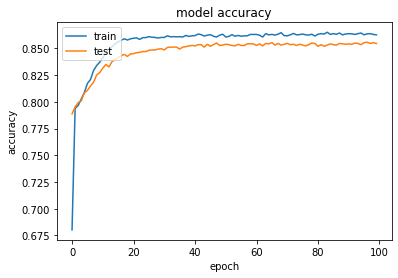

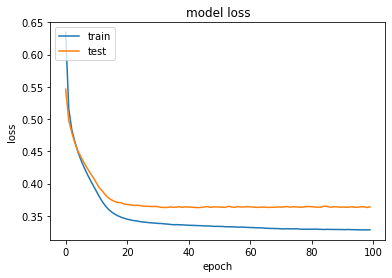

In [32]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/home/leo0419/Desktop/Complete-Deep-Learning-master/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)




